 Accuracy: 0.953125

 Final Result: Accuracy = 95.31% 

 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       801
           1       0.95      0.95      0.95       799

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



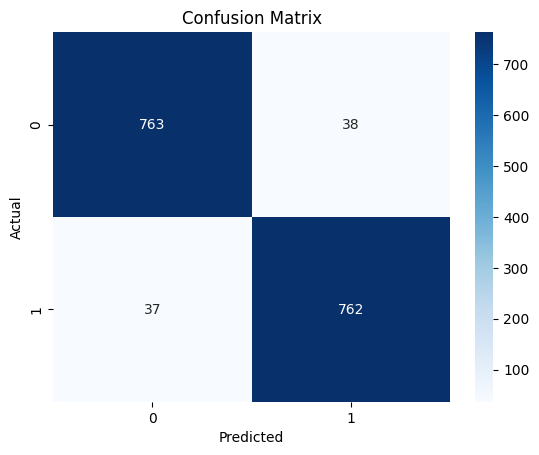

ROC-AUC = 0.95
The model is performing well in identifying both good and risky credit profiles.


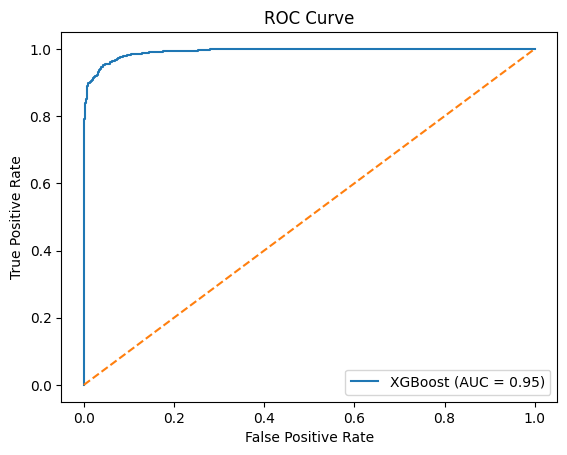

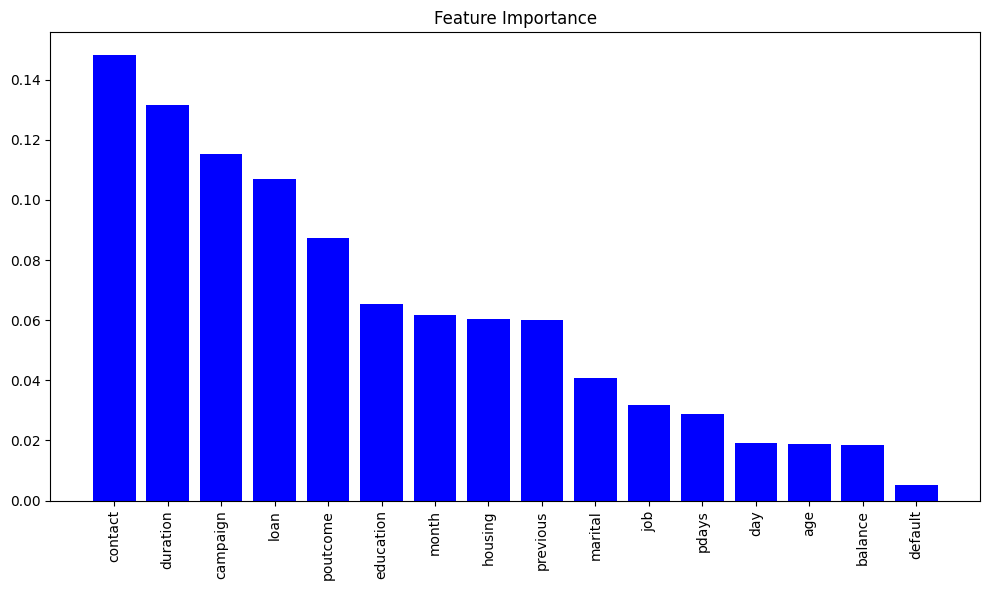

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Load Dataset
df = pd.read_csv('bank.csv', delimiter=';')

# Preprocessing
X = df.drop(['y'], axis=1)
y = df['y'].map({'no': 0, 'yes': 1})

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balancing the Data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model - XGBoost
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(" Accuracy:", accuracy)
print(f"\n Final Result: Accuracy = {accuracy:.2%} ")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC = {roc_auc:.2f}")
print("The model is performing well in identifying both good and risky credit profiles.")



fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

